In [3]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import cmocean.cm as cm
# from IPython import display
import os
import imageio

In [4]:
phys = xr.open_dataset('01mar23_3D_adv_01/SalishSea_1h_20230301_20230301_grid_T.nc')

In [5]:
fw_trace = xr.open_dataset('01mar23_3D_adv_01/SalishSea_1h_20230301_20230301_rivr_T.nc')

In [6]:
uvels = xr.open_dataset('01mar23_3D_adv_01/SalishSea_1h_20230301_20230301_grid_U.nc')

In [7]:
vvels = xr.open_dataset('01mar23_3D_adv_01/SalishSea_1h_20230301_20230301_grid_V.nc')

In [8]:
wvels = xr.open_dataset('01mar23_3D_adv_01/SalishSea_1h_20230301_20230301_grid_W.nc')

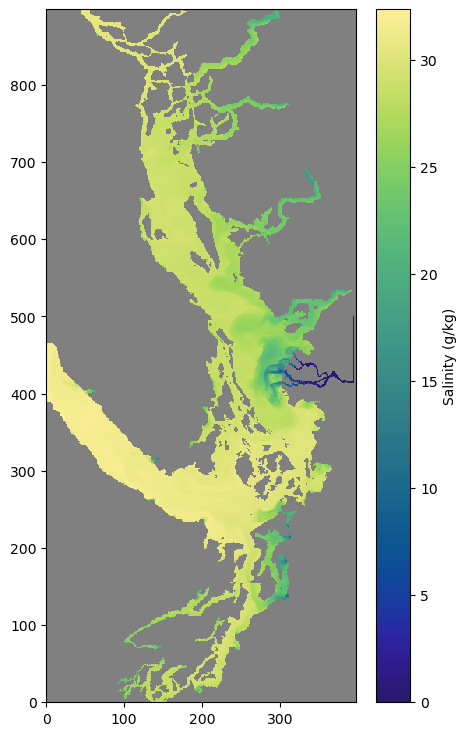

In [10]:
tstep = 0

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

cmap = cm.haline
cmap.set_bad('gray')
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
salinity = np.ma.masked_array(phys.vosaline[tstep, 0], mask=tmask[0])
colours = ax.pcolormesh(salinity, cmap=cmap)
cb = fig.colorbar(colours, ax=ax)
cb.set_label('Salinity (g/kg)')

In [11]:
phys.vosaline[:, 0].max()

<xarray.DataArray 'vosaline' ()>
array(32.61237717)
Coordinates:
    deptht   float32 0.5

In [13]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

cmap = cm.haline
cmap.set_bad('gray')

# os.makedirs('01mar23_3D_adv_01/sal01')

for tstep in np.arange(phys.vosaline[:, 0].shape[0]):
# for tstep in np.arange(5):
    fig, ax = plt.subplots(1, 1, figsize=(5, 9))
    salinity = np.ma.masked_array(phys.vosaline[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(salinity, vmin=0, vmax=32.5, cmap=cmap)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Salinity (g/kg)')

    plt.savefig('01mar23_3D_adv_01/sal01/sal01_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

/tmp/ipykernel_3420789/3038377679.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 9))


<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

<Figure size 500x900 with 0 Axes>

In [14]:
png_dir = '01mar23_3D_adv_01/sal01'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/sal01.gif', images, loop=4)

/tmp/ipykernel_3420789/1833831690.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/1833831690.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


## Rivers

In [15]:
import salishsea_tools.river_202108 as rivers

In [16]:
def river_box(w_shed, r_call, box_side):
    river_idx = [rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j']]
    river_range = [river_idx[0] - box_side, river_idx[0] + box_side, river_idx[1] - box_side, river_idx[1] + box_side]

    if (river_range[0] < 0):
        river_range[0] = 0
        river_range[1] = box_side*2

    if (898 - river_range[1] < 0):
        river_range[0] = 898-box_side*2
        river_range[1] = 898

    if (398 - river_range[3] < 0):
        river_range[2] = 398-box_side*2
        river_range[3] = 398

    return river_range

In [17]:
box_size = 30
# order (CW starting under the Fraser): Nooksack, Skagit, Snohomish, Nisqually, Elwha, Cowichan, Nanaimo, Puntledge, Salmon, Homathko, Squamish
Nooksack = river_box('fraser', 'Nooksack', box_size)
Skagit = river_box('skagit', 'Skagit1', box_size)
Snohomish = river_box('skagit', 'SnohomishAllenQuilceda', box_size)
Nisqually = river_box('puget', 'NisquallyMcAllister', box_size)
Elwha = river_box('jdf', 'Elwha', box_size)
Cowichan = river_box('evi_s', 'Cowichan1', box_size)
Nanaimo = river_box('evi_s', 'Nanaimo1', box_size)
Puntledge = river_box('evi_s', 'Puntledge', box_size)
Salmon = river_box('evi_n', 'SalmonSayward', box_size)
Homathko = river_box('bute', 'Homathko', box_size)
Squamish = river_box('howe', 'Squamish', box_size)
Fraser = river_box('fraser', 'Fraser', box_size)

## River Gifs

In [18]:
# move this to the top
os.makedirs('01mar23_3D_adv_01/Nooksack')
os.makedirs('01mar23_3D_adv_01/Skagit')
os.makedirs('01mar23_3D_adv_01/Snohomish')
os.makedirs('01mar23_3D_adv_01/Nisqually')
os.makedirs('01mar23_3D_adv_01/Elwha')
os.makedirs('01mar23_3D_adv_01/Cowichan')
os.makedirs('01mar23_3D_adv_01/Nanaimo')
os.makedirs('01mar23_3D_adv_01/Puntledge')
os.makedirs('01mar23_3D_adv_01/Salmon')
os.makedirs('01mar23_3D_adv_01/Homathko')
os.makedirs('01mar23_3D_adv_01/Squamish')
os.makedirs('01mar23_3D_adv_01/Fraser')

In [19]:
size = phys.vosaline[:, 0].shape[0]

In [20]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.nooksack_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Nooksack Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Nooksack[0], Nooksack[1])
    ax.set_xlim(Nooksack[2], Nooksack[3])

    plt.savefig('01mar23_3D_adv_01/Nooksack/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Nooksack'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Nooksack.gif', images, loop=4)

/tmp/ipykernel_3420789/627792023.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/627792023.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/627792023.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [23]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.skagit_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Skagit Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Skagit[0], Skagit[1])
    ax.set_xlim(Skagit[2], Skagit[3])

    plt.savefig('01mar23_3D_adv_01/Skagit/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Skagit'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Skagit.gif', images, loop=4)

/tmp/ipykernel_3420789/2625726448.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/2625726448.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/2625726448.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [25]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.snohomish_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Snohomish Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Snohomish[0], Snohomish[1])
    ax.set_xlim(Snohomish[2], Snohomish[3])

    plt.savefig('01mar23_3D_adv_01/Snohomish/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Snohomish'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Snohomish.gif', images, loop=4)

/tmp/ipykernel_3420789/3547792974.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/3547792974.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/3547792974.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [26]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.nisqually_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Nisqually Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Nisqually[0], Nisqually[1])
    ax.set_xlim(Nisqually[2], Nisqually[3])

    plt.savefig('01mar23_3D_adv_01/Nisqually/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Nisqually'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Nisqually.gif', images, loop=4)

/tmp/ipykernel_3420789/4003901256.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/4003901256.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/4003901256.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [27]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.elwha_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Elwha Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Elwha[0], Elwha[1])
    ax.set_xlim(Elwha[2], Elwha[3])

    plt.savefig('01mar23_3D_adv_01/Elwha/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Elwha'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Elwha.gif', images, loop=4)

/tmp/ipykernel_3420789/516927271.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/516927271.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/516927271.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [28]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.cowichan_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Cowichan Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Cowichan[0], Cowichan[1])
    ax.set_xlim(Cowichan[2], Cowichan[3])

    plt.savefig('01mar23_3D_adv_01/Cowichan/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Cowichan'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Cowichan.gif', images, loop=4)

/tmp/ipykernel_3420789/3173264920.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/3173264920.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/3173264920.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [29]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.nanaimo_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Nanaimo Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Nanaimo[0], Nanaimo[1])
    ax.set_xlim(Nanaimo[2], Nanaimo[3])

    plt.savefig('01mar23_3D_adv_01/Nanaimo/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Nanaimo'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Nanaimo.gif', images, loop=4)

/tmp/ipykernel_3420789/549922179.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/549922179.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/549922179.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [30]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.puntledge_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Puntledge Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Puntledge[0], Puntledge[1])
    ax.set_xlim(Puntledge[2], Puntledge[3])

    plt.savefig('01mar23_3D_adv_01/Puntledge/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Puntledge'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Puntledge.gif', images, loop=4)

/tmp/ipykernel_3420789/2181426792.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/2181426792.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/2181426792.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [32]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.salmon_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Salmon Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Salmon[0], Salmon[1])
    ax.set_xlim(Salmon[2], Salmon[3])

    plt.savefig('01mar23_3D_adv_01/Salmon/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Salmon'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Salmon.gif', images, loop=4)

/tmp/ipykernel_3420789/2486101138.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/2486101138.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/2486101138.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [34]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.homathko_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Homathko Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Homathko[0], Homathko[1])
    ax.set_xlim(Homathko[2], Homathko[3])

    plt.savefig('01mar23_3D_adv_01/Homathko/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Homathko'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Homathko.gif', images, loop=4)

/tmp/ipykernel_3420789/517010833.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/517010833.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/517010833.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [35]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.squamish_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Squamish Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Squamish[0], Squamish[1])
    ax.set_xlim(Squamish[2], Squamish[3])

    plt.savefig('01mar23_3D_adv_01/Squamish/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Squamish'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Squamish.gif', images, loop=4)

/tmp/ipykernel_3420789/4022650695.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/4022650695.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/4022650695.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [38]:
cmap = mpl.colormaps['Blues']
cmap.set_bad('gray')

# can turn this arange into a global thing too
for tstep in np.arange(size):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    freshwater = np.ma.masked_array(fw_trace.fraser_river[tstep, 0], mask=tmask[0])
    colours = ax.pcolormesh(freshwater, cmap=cmap, vmin=0, vmax=1)
    cb = fig.colorbar(colours, ax=ax)
    cb.set_label('Simulated Dye')
    ax.set_title('Fraser Timestep = {}'.format(str(tstep)))
    ax.set_ylim(Fraser[0], Fraser[1])
    ax.set_xlim(Fraser[2], Fraser[3])

    plt.savefig('01mar23_3D_adv_01/Fraser/dye_tstep' + str(tstep).zfill(3) + '.png')

    plt.clf()

png_dir = '01mar23_3D_adv_01/Fraser'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

# Make it pause at the end so that the viewers can ponder
for _ in range(2):
    images.append(imageio.imread(file_path))

imageio.mimsave('01mar23_3D_adv_01/Fraser.gif', images, loop=4)

/tmp/ipykernel_3420789/3940207226.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(5, 5))
/tmp/ipykernel_3420789/3940207226.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
/tmp/ipykernel_3420789/3940207226.py:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imagei

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

## River Stills

In [39]:
# tstep = 23

# cmap = mpl.colormaps['Blues']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# freshwater = np.ma.masked_array(fw_trace.puntledge_river[tstep, 0], mask=tmask[0])
# colours = ax.pcolormesh(freshwater, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater puntledge')
# ax.set_title('Timestep = {}'.format(str(tstep)))
# ax.scatter(rivers.prop_dict['evi_s']['Puntledge']['j'],rivers.prop_dict['evi_s']['Puntledge']['i'],color='r', alpha = 0.5)
# ax.set_ylim(Puntledge[0], Puntledge[1])
# ax.set_xlim(Puntledge[2], Puntledge[3])

# # ax.set_ylim(650, 750)
# # ax.set_xlim(80, 180)

In [40]:
# tstep = 23

# cmap = mpl.colormaps['Blues']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# freshwater = np.ma.masked_array(fw_trace.elwha_river[tstep, 0], mask=tmask[0])
# colours = ax.pcolormesh(freshwater, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater elwha')
# ax.set_title('Timestep = {}'.format(str(tstep)))
# ax.scatter(rivers.prop_dict['jdf']['Elwha']['j'],rivers.prop_dict['jdf']['Elwha']['i'],color='r', alpha = 0.5)
# ax.set_ylim(Elwha[0], Elwha[1])
# ax.set_xlim(Elwha[2], Elwha[3])

# ax.set_ylim(200, 300)
# ax.set_xlim(105, 205)

In [41]:
# tstep = 23

# cmap = mpl.colormaps['Blues']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# freshwater = np.ma.masked_array(fw_trace.nanaimo_river[tstep, 0], mask=tmask[0])
# colours = ax.pcolormesh(freshwater, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater nanaimo')
# ax.set_title('Timestep = {}'.format(str(tstep)))
# ax.scatter(rivers.prop_dict['evi_s']['Nanaimo1']['j'],rivers.prop_dict['evi_s']['Nanaimo1']['i'],color='r', alpha = 0.5)
# ax.set_ylim(Nanaimo[0], Nanaimo[1])
# ax.set_xlim(Nanaimo[2], Nanaimo[3])

In [42]:
# tstep = 23

# cmap = mpl.colormaps['Blues']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# freshwater = np.ma.masked_array(fw_trace.nisqually_river[tstep, 0], mask=tmask[0])
# colours = ax.pcolormesh(freshwater, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater nisqually')
# ax.set_title('Timestep = {}'.format(str(tstep)))
# ax.scatter(rivers.prop_dict['puget']['NisquallyMcAllister']['j'],rivers.prop_dict['puget']['NisquallyMcAllister']['i'],color='r', alpha = 0.5)
# ax.set_ylim(Nisqually[0], Nisqually[1])
# ax.set_xlim(Nisqually[2], Nisqually[3])

In [43]:
# tstep = 23

# cmap = mpl.colormaps['Blues']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# freshwater = np.ma.masked_array(fw_trace.nisqually_river[tstep, 0], mask=tmask[0])
# colours = ax.pcolormesh(freshwater, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater nisqually')
# ax.set_title('Timestep = {}'.format(str(tstep)))
# ax.scatter(rivers.prop_dict['howe']['Squamish']['j'],rivers.prop_dict['howe']['Squamish']['i'],color='r', alpha = 0.5)
# ax.set_ylim(Squamish[0], Squamish[1])
# ax.set_xlim(Squamish[2], Squamish[3])

In [44]:
# tstep = 23

# cmap = mpl.colormaps['Blues']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# freshwater = np.ma.masked_array(fw_trace.fraser_river[tstep, 0], mask=tmask[0])
# colours = ax.pcolormesh(freshwater, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater fraser')
# ax.set_title('Timestep = {}'.format(str(tstep)))
# ax.scatter(rivers.prop_dict['fraser']['Fraser']['j'],rivers.prop_dict['fraser']['Fraser']['i'],color='r')
# ax.set_ylim(480, 510)
# ax.set_xlim(368, 398)

In [45]:
# tstep = -1

# cmap = mpl.colormaps['Blues']
# cmap.set_bad('gray')
# fig, ax = plt.subplots(1, 1, figsize=(5, 9))
# freshwater = np.ma.masked_array(fw_trace.other_rivers[tstep, 0], mask=tmask[0])
# colours = ax.pcolormesh(freshwater, cmap=cmap)
# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('freshwater all other rivers')
# ax.set_title('Timestep = {}'.format(str(tstep)))